<div>
  <img src="iteso_logo.png" style="width:10px;height:10px; vertical-align:middle;" align="middle">
</div>
<h2><center><i>PROBABILISTIC GRAPHICAL MODELS  - Autumn 2021</i></center></h2>
<a id='top'></a>
    

<center><h2>Final Project:</h2></center><br>
<center><h2>Learning Bayesian Newtork with Variable Elimination for Craft Beer Characteristics</h2></center><br>


<form action="/action_page.php">
  <fieldset>
    <legend><strong>Presented by</strong></legend>
    
   <div class="card">       
  <h4 class="card-header"> Adrian Ramos Pérez &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;6/12/2021</h4> 
  <div class="card-body">
      <h5 class="card-title">📬<a href="mailto:adrian.ramos@iteso.mx"> adrian.ramos@iteso.mx</a></h5>
   
  </div>       
</div>
    
  </fieldset>
</form>

---

<div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home" style="background-color:#004270;">Notebook Content</h3>    
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#problem" role="tab" aria-controls="profile">1. Problem Description<span class="badge badge-primary badge-pill">1</span></a>
<a class="list-group-item list-group-item-action" data-toggle="list" href="#pgm" role="tab" aria-controls="messages">2. Probabilistic Graphical Model proposal<span class="badge badge-primary badge-pill">2</span></a>
        <a class="list-group-item list-group-item-action" data-toggle="list" href="#eda" role="tab" aria-controls="messages">EDA<span class="badge badge-primary badge-pill">2</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="pe" role="tab" aria-controls="messages">Parameter estimation<span class="badge badge-primary badge-pill">5</span></a> 
<a class="list-group-item list-group-item-action" data-toggle="list" href="model_eval" role="tab" aria-controls="messages">3. Model Evaluation<span class="badge badge-primary badge-pill">3</span></a>   
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#quer" role="tab" aria-controls="messages">4. Queries and Inference<span class="badge badge-primary badge-pill">4</span></a>        
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#class" role="tab" aria-controls="messages">Classification<span class="badge badge-primary badge-pill">6</span></a>   
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#concl" role="tab" aria-controls="messages">5. Conclusion - Notes - Comments<span class="badge badge-primary badge-pill">7</span></a>    
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#ref" role="tab" aria-controls="messages">References<span class="badge badge-primary badge-pill">8</span></a>
    
</div>

# 1. Problem Description: <a id='problem'></a>

Craft beer is loved all around the world. For beer lovers is a pleasure to taste lot and differents kind of beers, but for a craftsman is not that easy to obtain desired the characteristics of a home made beer.

Variable definition summary:
**Style: Beer style (categorical)**    
* ABV: Alcohol conten of beer %
** Min IBU **
- Max IBU

---

# 2. Probabilistic Graphical Model proposal <a id='pgm'></a>

The chosen representation for the problem is a Bayesian Network, which its parameters are learned

In [86]:
import pandas as pd
import seaborn as sns
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import ParameterEstimator
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD
from pgmpy.factors.discrete import DiscreteFactor

### Exploratory Data Analysis (EDA) <a id='eda'></a>

In [28]:
data = pd.read_csv("beer_profile_and_ratings.csv")
data.describe()

,ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
count,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000
mean,6.526688,21.180482,38.986863,16.515796,46.129496,17.055990,36.364404,58.270879,33.145449,1.017204,38.529559,40.924617,18.345637,75.330935,3.638789,3.754393,3.660428,3.702496,3.747522,233.284955
std,2.546997,13.242242,21.355281,10.410661,25.947842,17.331334,25.791152,34.281310,35.780172,2.132651,32.296646,30.403641,23.756582,39.909338,0.503209,0.403416,0.449937,0.510361,0.444288,361.811847
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.509615,1.571429,1.285714,1.214286,1.136364,1.000000
25%,5.000000,15.000000,25.000000,9.000000,29.000000,6.000000,17.000000,33.000000,11.000000,0.000000,12.000000,18.000000,4.000000,45.000000,3.422559,3.604651,3.470021,3.500000,3.566667,23.000000
50%,6.000000,20.000000,35.000000,14.000000,40.000000,11.000000,31.000000,54.000000,22.000000,0.000000,29.000000,33.000000,10.000000,73.000000,3.720183,3.833333,3.741667,3.791667,3.830239,93.000000
75%,7.600000,25.000000,45.000000,21.000000,58.000000,22.000000,52.000000,77.000000,42.000000,1.000000,60.000000,56.000000,23.000000,103.000000,3.978000,4.000000,3.965587,4.033333,4.032847,284.000000
max,57.500000,65.000000,100.000000,81.000000,175.000000,139.000000,150.000000,263.000000,284.000000,48.000000,175.000000,172.000000,184.000000,239.000000,5.000000,4.666667,5.000000,5.000000,5.000000,3290.000000


In [29]:
data.head()

,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,...,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.3,25,50,13,32,...,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497
1,Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",7.2,25,50,12,57,...,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...,5.0,25,50,14,37,...,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377
3,Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Notes:,8.5,25,50,13,55,...,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368
4,Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Notes:Called 'Dark Double Alt' on the label.Se...,7.2,25,50,25,51,...,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96


In [30]:
data = data.iloc[:,:19]
data.rename(columns={"Min IBU":"MinIBU","Max IBU":"MaxIBU"}, inplace=True)
data.drop(columns=['Name','Brewery','Beer Name (Full)','Description'], inplace=True)
data

,Style,ABV,MinIBU,MaxIBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,Altbier,5.3,25,50,13,32,9,47,74,33,0,33,57,8,111
1,Altbier,7.2,25,50,12,57,18,33,55,16,0,24,35,12,84
2,Altbier,5.0,25,50,14,37,6,42,43,11,0,10,54,4,62
3,Altbier,8.5,25,50,13,55,31,47,101,18,1,49,40,16,119
4,Altbier,7.2,25,50,25,51,26,44,45,9,1,11,51,20,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,Winter Warmer,8.8,35,50,15,37,24,35,46,19,0,23,45,67,74
3193,Winter Warmer,6.0,35,50,15,31,23,16,54,43,0,54,14,140,58
3194,Winter Warmer,6.8,35,50,8,44,24,19,52,21,0,26,21,96,77
3195,Winter Warmer,7.5,35,50,11,36,50,70,72,59,0,81,110,18,73


We run a correlation matrix to verify assumptions on the relationships between our variables, adn get some insights from the data.
Note that:
- As we expected, ABV has a strong correlation with Alcohol taste, 
- bitterness and hoppy taste has a very strong correlation, 
- sweetness and malty tastes has a not so strong correlation as expected but there it is. 
- Sweetnes has an inverse correlation to Astrngency, Salty and Hoppy tasets.

In [90]:
# Correlation matrix
corr = data.corr()
corr

,ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
ABV,1.000000,0.432005,0.501037,-0.169521,0.241673,0.654908,0.067388,0.463487,0.100795,-0.120089,0.291001,-0.052596,0.191468,0.162060,0.416197,0.349139,0.392517,0.381200,0.251838,0.142176
Min IBU,0.432005,1.000000,0.854248,-0.071501,0.325338,0.323694,0.539452,0.227139,-0.073098,-0.057512,0.066335,0.407475,-0.046152,0.300041,0.343730,0.380908,0.352723,0.339885,0.289972,0.219822
Max IBU,0.501037,0.854248,1.000000,-0.120273,0.310617,0.392811,0.478080,0.277292,-0.043275,-0.083214,0.172929,0.345168,0.044533,0.288219,0.369456,0.379655,0.355608,0.346557,0.271969,0.221572
Astringency,-0.169521,-0.071501,-0.120273,1.000000,-0.059540,-0.171987,0.114686,-0.021456,0.571030,0.347155,0.345232,0.330951,-0.083795,-0.082085,0.068579,0.070948,0.106950,0.092021,0.159788,-0.050062
Body,0.241673,0.325338,0.310617,-0.059540,1.000000,0.268885,0.542236,0.458842,-0.126733,-0.099277,-0.048155,0.070138,0.185123,0.754228,0.360234,0.421331,0.345270,0.365055,0.313824,0.039057
Alcohol,0.654908,0.323694,0.392811,-0.171987,0.268885,1.000000,0.009088,0.527039,0.048767,-0.094329,0.254299,-0.079949,0.252876,0.270106,0.242989,0.184693,0.205569,0.206701,0.069789,0.048346
Bitter,0.067388,0.539452,0.478080,0.114686,0.542236,0.009088,1.000000,0.091705,-0.136914,0.004693,-0.093450,0.712887,-0.084048,0.565570,0.241457,0.331854,0.257267,0.253373,0.260874,0.112026
Sweet,0.463487,0.227139,0.277292,-0.021456,0.458842,0.527039,0.091705,1.000000,0.257913,-0.131918,0.482030,-0.034327,0.107548,0.471032,0.356514,0.332311,0.315767,0.322277,0.207293,0.048487
Sour,0.100795,-0.073098,-0.043275,0.571030,-0.126733,0.048767,-0.136914,0.257913,1.000000,0.098173,0.785883,0.068895,0.001831,-0.303266,0.289320,0.204817,0.245169,0.244314,0.213449,0.006642
Salty,-0.120089,-0.057512,-0.083214,0.347155,-0.099277,-0.094329,0.004693,-0.131918,0.098173,1.000000,0.026920,0.172606,-0.023079,-0.028241,-0.088210,-0.081388,-0.038413,-0.057479,-0.008199,-0.029680


<AxesSubplot:>

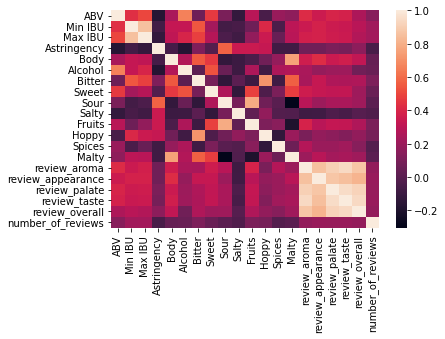

In [91]:
# heatmap plotting
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

## Knowledge Engineering

<div>
  <img src="ipa.jpg" width="500"height="10" vertical-align"middle" float"right" align="middle">
</div>

A Bayesian Network is a DAG or Directed Acyclic Graph, that implies relationships of dependance and independance between the random variables of the model, for that reason a network structure is needed in order to calculate thte parameters of the network.

The path for this model abstraction is a mixture of knowledge engineering and some prior knowledge from experts and sources (see <a href="#ref">References</a>).

* Craft beer enthusiast know that Hop is the ingredient that provides **bitterness**, which traduces into a **fruity** flavor, sometimes citric and sometimes not citric but fruity anyway, styles of Indian Pale Ale and New Engalnd IPA.
* According to several authors, about 80% of **bitterness** originates from hops during boiling []
* **Astringency** is the result of
* **Sweetness** is a characteristic that comes from the **malt**, because sugar generates from the malt grain.
* Our dataset only variable that relates to yeast is the style of the beer.
* Yeast turns sugar into alcohol and CO2 in the process of fermentation, so we assume it has a possibly inverse relationship with **sweetness**. 
* Some yeast influence can have **spices** flavor.
* Style of beer can introduce some others to malt (i.e. wheat, rice, etc) has an effect on beer **body**, they DON'T take part in the creation of sugar but can increase foam retention, making 
* Saltiness characteristic comes from minerals in the water, this can only be related to Style

### Network Definition

From the previous knowledge engineering step we were able to construct and encode our BN model in SAMIAM:

In [53]:
bayes_net = BayesianNetwork([("Style","ABV"),
                             ("Style","MinIBU"),
                             ("Style","MaxIBU"),
                             ("ABV","Astringency"),
                             ("ABV","Body"),
                             ("ABV","Alcohol"),
                             ("MinIBU","Bitter"),
                             ("MaxIBU","Bitter"),("Bitter","Hoppy"),])
bayes_net
# Cheking for local dependences/independeces:
bayes_net.local_independencies(["Style","ABV","MinIBU","MaxIBU","Astringency","Body","Alcohol","Bitter","Hoppy","Sweet","Salty","Sour","Fruits","Malty","Spices"])

KeyError: 'Hoppy'

### Parameter estimation: State counts

In [32]:
pe = ParameterEstimator(bayes_net, data)
pe.state_counts('Style')

,Style
Altbier,39
Barleywine - American,38
Barleywine - English,26
Bitter - English,41
Bitter - English Extra Special / Strong Bitter (ESB),33
...,...
Wheat Beer - Kristallweizen,26
Wheat Beer - Wheatwine,15
Wheat Beer - Witbier,36
Wild Ale,23


In [33]:
pe.state_counts('Bitter')

MinIBU,0,3,5,6,8,9,10,15,17,18,...,23,25,30,35,40,45,50,55,60,65
Bitter,,,,,,,,,,,,,,,,,,,,,
0,15.0,0.0,0.0,2.0,0.0,0.0,7.0,3.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,14.0,0.0,2.0,2.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10.0,1.0,4.0,0.0,1.0,0.0,8.0,9.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.0,1.0,2.0,1.0,1.0,0.0,12.0,6.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,7.0,0.0,8.0,1.0,0.0,0.0,11.0,8.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Parameter Estimation: Maximum Likelihood Estimation (MLE)

In [49]:
mle = MaximumLikelihoodEstimator(bayes_net,data)
print(mle.estimate_cpd('Body'))

+-----------+---------------------+-----------+-----+-----------+-----------+------------+-----------+
| ABV       | ABV(0.0)            | ABV(0.05) | ... | ABV(20.0) | ABV(28.0) | ABV(30.86) | ABV(57.5) |
+-----------+---------------------+-----------+-----+-----------+-----------+------------+-----------+
| Body(0)   | 0.0                 | 0.0       | ... | 0.0       | 0.0       | 0.0        | 0.0       |
+-----------+---------------------+-----------+-----+-----------+-----------+------------+-----------+
| Body(1)   | 0.0                 | 0.0       | ... | 0.0       | 0.0       | 0.0        | 0.0       |
+-----------+---------------------+-----------+-----+-----------+-----------+------------+-----------+
| Body(2)   | 0.0                 | 0.0       | ... | 0.0       | 0.0       | 0.0        | 0.0       |
+-----------+---------------------+-----------+-----+-----------+-----------+------------+-----------+
| Body(3)   | 0.0                 | 0.0       | ... | 0.0       | 0.0    

Conditional probabilities distributions for all random variables:

In [ ]:
cpd_X = TabularCPD(variable="X", variable_card=2, values= [])
cpd_Y = TabularCPD(variable="Y", variable_card=2, evidence=['',''], evidence_card=[2,2], values =)

---

# 3. Model Evaluation <a id='model_eval'></a>

 

   Metrics to evaluate Bayesian Networks are:
   * BDeu: Bayesian Dirichlet equivalent uniform
   * K2
   * BIC
   * Jeffrey

---

# 4. Queries and Inference <a id='quer'></a>

# Future Improvements

There is a lot of room for improvement in this model's application and construction. Some are:

* Use to Structure Learning to learn the network structure and compare models
* Transformation on continuous data to discretized values.

---

# 5. Beer Style as a topics model aproximation using Latent Dirichlet Allocation (LDA) <a id='lda'></a>

From the dataset we observe that each style of beer has reviews that 

In [83]:
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

def plot_top_words(model, feature_names, n_top_words, title):
    # Malla para graficar 2 filas 5 columnas
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    # model.components_ hace referencia a la matriz phi
    for topic_idx, topic in enumerate(model.components_):
        # La hacemos distribución
        topic /= topic.sum()
        # Seleccionamos los índices más relevantes del tópico
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        # Obtenemos las palabras
        top_features = [feature_names[i] for i in top_features_ind]
        # Obtenemos la ponderación
        weights = topic[top_features_ind]
        
        # Graficamos barras horizontales por tópicos con las palabras más relevantes
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

data = pd.read_csv("beer_profile_and_ratings.csv")

data.drop(columns=['Name','Brewery','Beer Name (Full)'],inplace=True)

In [80]:
docs_num, topics_num, words_num = 3000, 10, 1000

In [81]:
vectorizer = CountVectorizer()
corpus = vectorizer.fit_transform(data[:])

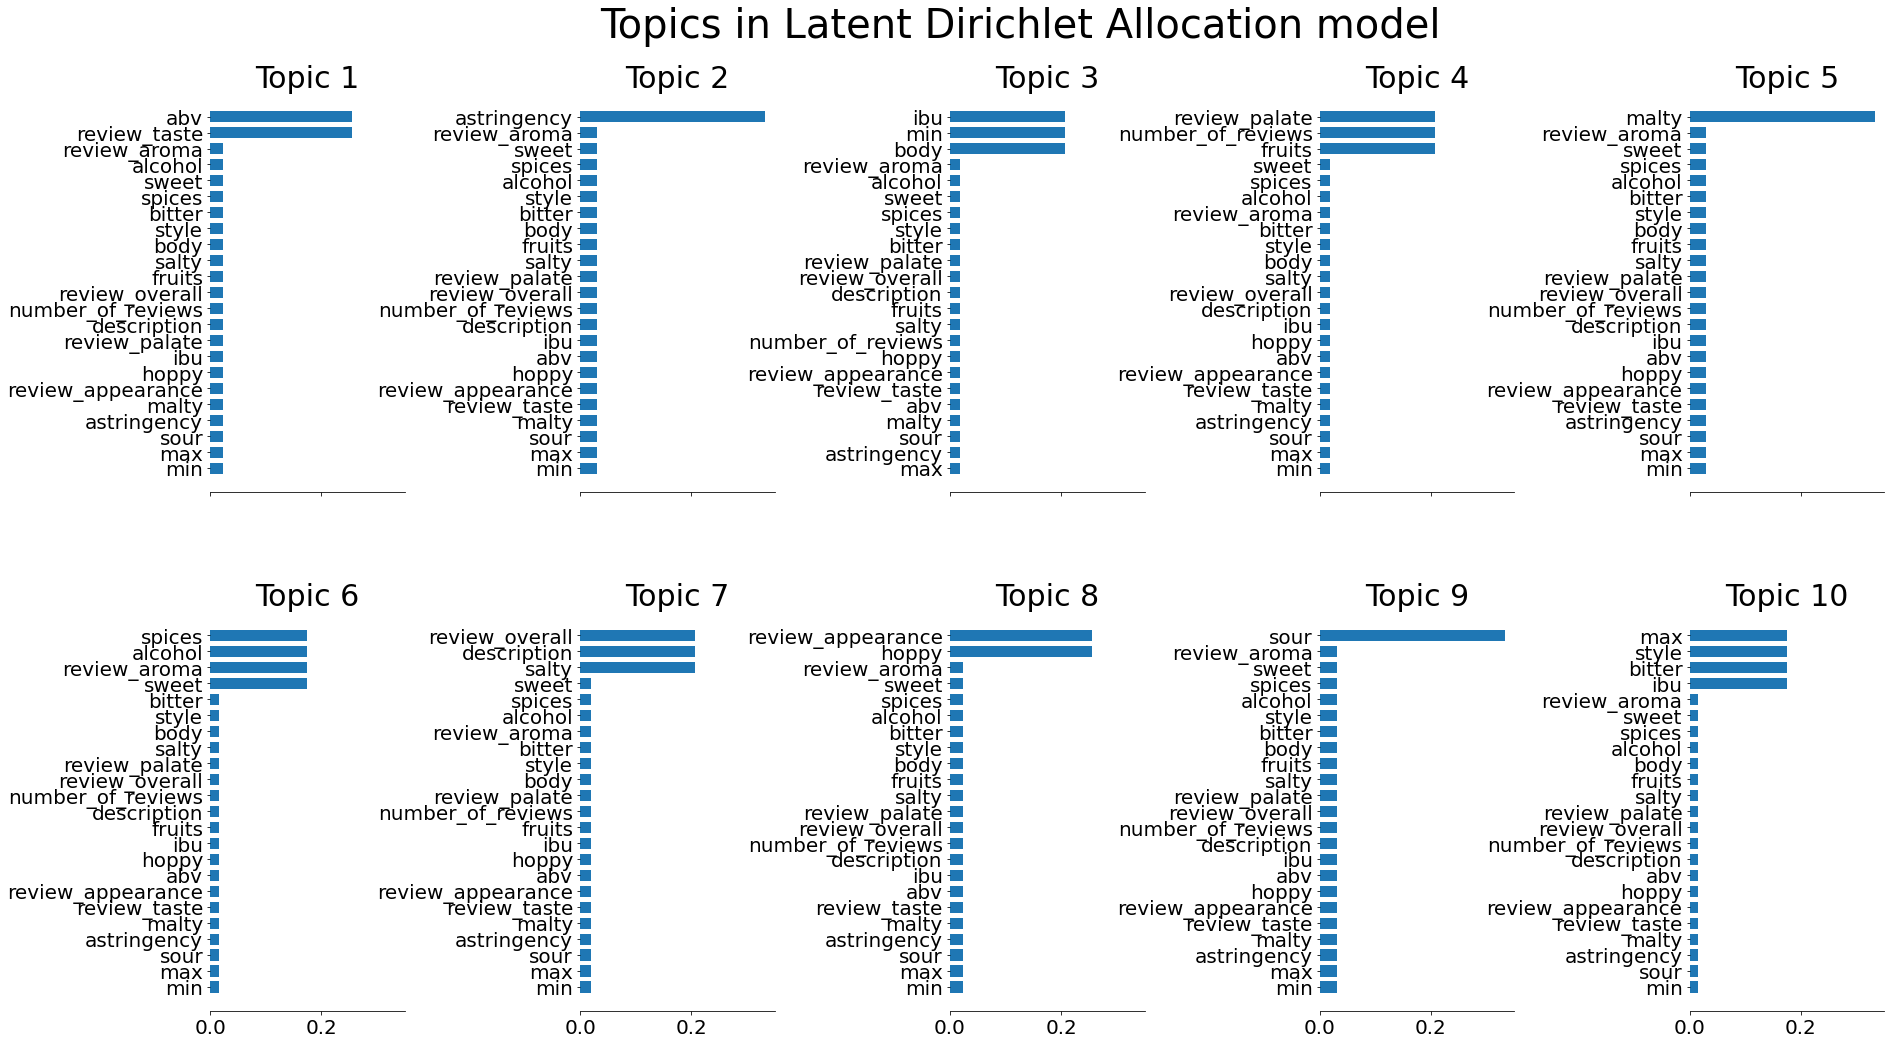

In [84]:
# Latent Dirichlet Allocation
LDA = LatentDirichletAllocation(n_components=topics_num)
LDA.fit(corpus)

plot_top_words(LDA, vectorizer.get_feature_names_out(), 100, 'Topics in Latent Dirichlet Allocation model')


---

# 5. Conclusions <a id='concl'></a>

Learning parameter of a Bayesian Network can be tricky, some considerations need to be made:
* Maximum Likelihood Estimator does not change as more data is observed, due to the lack of representation of uncertainty.
* MLE can infer a possibility as not possible
* With Latent Dirichlet Allocation model 

# References: <a id='ref'></a>

Dataset:
https://www.kaggle.com/ruthgn/beer-profile-and-ratings-data-set

[] Habschied, K.; Košir, I.J.; Krstanovi´c, V.; Kumri´c, G.; Mastanjevi´c, K. Beer Polyphenols—Bitterness, Astringency, and Off-Flavors. Beverages 2021, 7, 38. https://doi.org/10.3390/beverages7020038

[]Suzuki, Joe. A Theoretical Analysis of the BDeu Scores in Bayesian Network Structure Learning

[]Ferguson, Euan. (2016). Craft Brew: 50 Homebrew Receipes from the World's Best Craft Breweries.

http://beersmith.com/blog/2012/08/12/sour-off-flavors-in-home-brewed-beer/
